<a href="https://colab.research.google.com/github/femketenharkel/Predicting_Ratings/blob/main/models/clustering/K-Means_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Means clustering

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from google.colab import drive
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from joblib import Parallel, delayed
import joblib

In [1]:
# Load in the data
drive.mount('/content/drive')
df_final = pd.read_csv('/content/drive/My Drive/Thesis/Data/df_final.csv')

Mounted at /content/drive


In [4]:
df_final.head()

,UserID,MovieID,Rating,Year,Month,Day,Hour,Age,Release_year,Female,...,Favourite_Musical,Favourite_Mystery,Favourite_Romance,Favourite_Sci-Fi,Favourite_Thriller,Favourite_War,Favourite_Western,Time_release_to_rating,Total_ratings_per_movie,Total_ratings_per_user
0,1645,485,3,2000,11,23,12,1,1993,True,...,True,False,False,False,False,False,False,7,203,228
1,3112,357,4,2000,9,20,20,1,1994,False,...,False,False,False,False,False,False,False,6,482,86
2,2077,2792,2,2000,11,19,19,1,1982,False,...,False,False,False,False,False,False,False,18,219,270
3,868,2279,4,2000,11,26,23,5,1998,False,...,False,True,False,False,False,False,False,2,84,30
4,2773,1103,4,2000,11,1,10,3,1955,False,...,False,False,False,False,False,False,False,45,160,34


In [3]:
# Exclude target variable and unique identifiers for clustering.
df = df_final.drop(columns= ['Rating', 'MovieID', 'UserID'])

In [7]:
df.columns

Index(['Year', 'Month', 'Day', 'Hour', 'Age', 'Release_year', 'Female', 'Male',
       'Academic/educator', 'Artist', 'Clerical/admin', 'College/grad student',
       'Customer service', 'Doctor/health care', 'Executive/managerial',
       'Farmer', 'Homemaker', 'K-12 student', 'Lawyer',
       'Other or not specified', 'Programmer', 'Retired', 'Sales/marketing',
       'Scientist', 'Self-employed', 'Technician/engineer',
       'Tradesman/craftsman', 'Unemployed', 'Writer', 'Action', 'Adventure',
       'Animation', 'Children's', 'Comedy', 'Crime', 'Documentary', 'Drama',
       'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance',
       'Sci-Fi', 'Thriller', 'War', 'Western', 'Favourite_Action',
       'Favourite_Adventure', 'Favourite_Animation', 'Favourite_Children's',
       'Favourite_Comedy', 'Favourite_Crime', 'Favourite_Documentary',
       'Favourite_Drama', 'Favourite_Fantasy', 'Favourite_Film-Noir',
       'Favourite_Horror', 'Favourite_Musical', 'Favourite_My

In [4]:
# Scaling the variables
scaler = MinMaxScaler()
features_to_scale = ['Year', 'Month', 'Day', 'Hour', 'Age', 'Release_year',
                       'Time_release_to_rating', 'Total_ratings_per_movie',
                       'Total_ratings_per_user' ]
df[features_to_scale] = scaler.fit_transform(df[features_to_scale])

In [5]:
df.head()

,Year,Month,Day,Hour,Age,Release_year,Female,Male,Academic/educator,Artist,...,Favourite_Musical,Favourite_Mystery,Favourite_Romance,Favourite_Sci-Fi,Favourite_Thriller,Favourite_War,Favourite_Western,Time_release_to_rating,Total_ratings_per_movie,Total_ratings_per_user
0,0.0,0.909091,0.733333,0.521739,0.166667,0.913580,True,False,False,False,...,True,False,False,False,False,False,False,0.085366,0.147123,0.246995
1,0.0,0.727273,0.633333,0.869565,0.166667,0.925926,False,True,False,False,...,False,False,False,False,False,False,False,0.073171,0.350328,0.091803
2,0.0,0.909091,0.600000,0.826087,0.166667,0.777778,False,True,False,False,...,False,False,False,False,False,False,False,0.219512,0.158776,0.292896
3,0.0,0.909091,0.833333,1.000000,0.833333,0.975309,False,True,False,False,...,False,True,False,False,False,False,False,0.024390,0.060452,0.030601
4,0.0,0.909091,0.000000,0.434783,0.500000,0.444444,False,True,False,True,...,False,False,False,False,False,False,False,0.548780,0.115805,0.034973


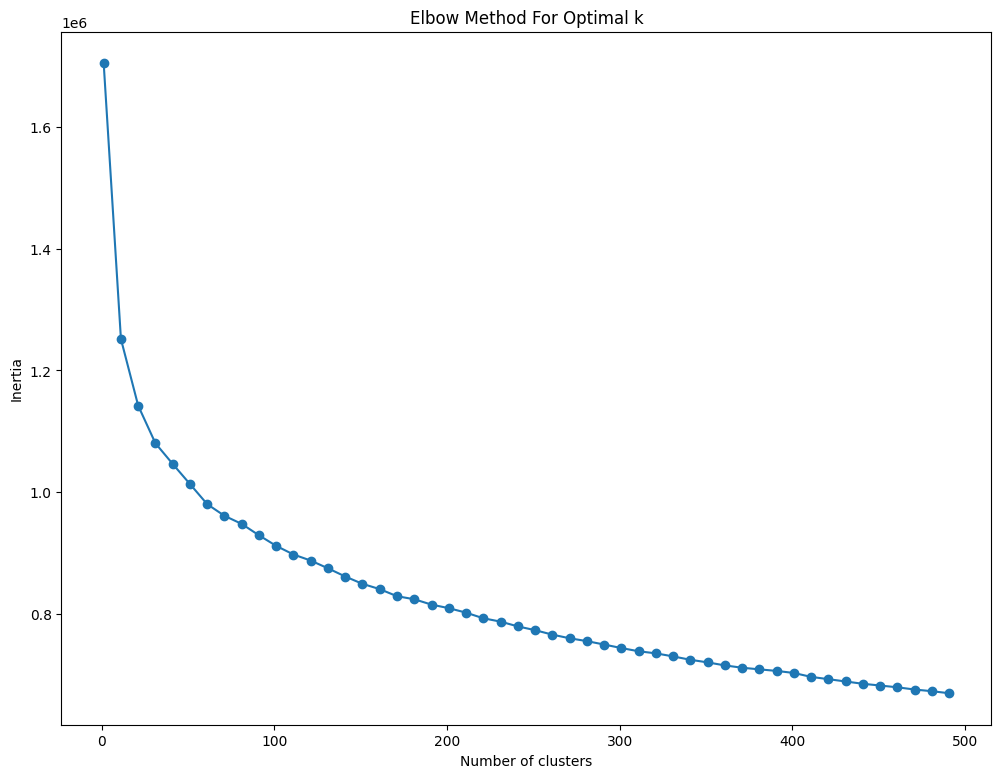

In [7]:
# Decide on cluster size using the Elbow method

# Range of clusters to evaluate
cluster_range = range(1, 500, 10)
inertia = []

# Calculate the within-cluster sum of squares for each number of clusters
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df)
    inertia.append(kmeans.inertia_)

# Plot the results to find the elbow point
plt.figure(figsize=(12, 9))
plt.plot(cluster_range, inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [8]:
# Determine Silhouette score for optimal k
optimal_k = 400

# Create and fit the KMeans model
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(df)

# Assign cluster labels to df
labels = kmeans.labels_
df['cluster'] = labels

# Calculate silhouette score
silhouette_avg = silhouette_score(df, labels)

print(f'Silhouette Score for {optimal_k} clusters: {silhouette_avg}')

Silhouette Score for 400 clusters: 0.3829503558451258


In [11]:
df.to_csv('/content/drive/My Drive/Thesis/Data/df_final_K-means_Clustering.csv', index=False)